[['4.19', '3.92', '', '', ''], ['3.40', '4.26', '0.29', '', ''], ['5.06', '3.21', '3.4', '3.12', ''], ['3.91', '4.77', '5.67', '4.14', ''], ['', '4.84', '5.11', '5.76', '5.63'], ['', '', '4.96', '3.9', '5.12']]


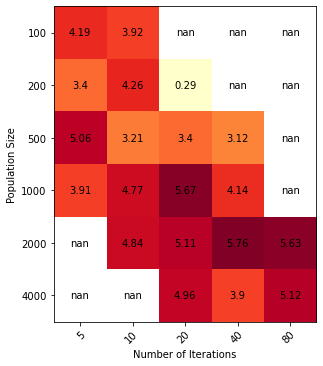

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# Open CSV file and read it into a 2D array
with open('Num_Iter_vs_Pop.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    data = [row for row in csvreader]

# Print the data array
data = [row[:-1] for row in data]
print(data)

POP = ["100", "200", "500", "1000", "2000", "4000"]
NI = ["5", "10", "20", "40", "80"]

def heatmap(data, cmap='YlOrRd'):
    fig, ax = plt.subplots(figsize=(5, 5))  # Double the default size
    im = ax.imshow(data, cmap=cmap)

    # Set ticks for each cell
    ax.set_xticks(np.arange(len(NI)))
    ax.set_yticks(np.arange(len(POP)))

    # Set tick labels
    ax.set_xticklabels(NI)
    ax.set_yticklabels(POP)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add annotations to each cell
    for i in range(len(data)):
        for j in range(len(data[0])):
            text = ax.text(j, i, data[i][j], ha="center", va="center", color="black")

    # Set plot title and show plot
    fig.tight_layout()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Population Size')
    plt.show()

def replace_strings_with_floats(dataset):
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            try:
                dataset[i][j] = float(dataset[i][j])
            except ValueError:
                if dataset[i][j] == '':
                    dataset[i][j] = np.nan
    return dataset

data = replace_strings_with_floats(data)

heatmap(data)


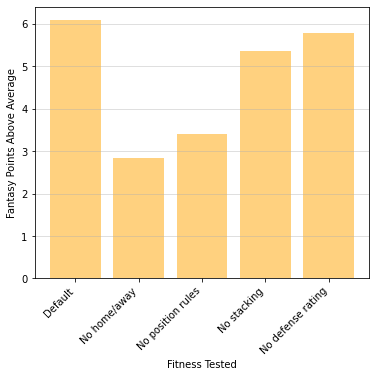

In [3]:
data2 = [6.10, 2.84, 3.40, 5.35, 5.78]
labels = ["Default", "No home/away", "No position rules", "No stacking", "No defense rating"]

x_pos = np.arange(len(labels))

# create bar graph
fig = plt.figure(figsize=(6, 5))
plt.bar(x_pos, data2, align='center', alpha=0.5, color="orange")

# add labels
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.xlabel('Fitness Tested')
plt.ylabel('Fantasy Points Above Average')
plt.grid(axis='y', alpha=0.5)

# show plot
plt.show()

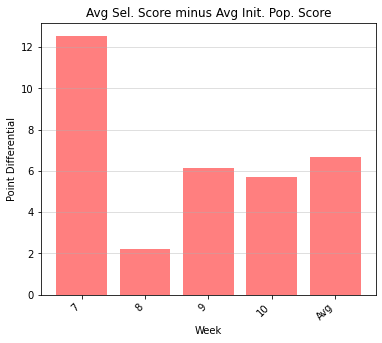

In [40]:
avg = (12.54+2.21+6.13+5.70)/4.00
data3 = [12.54, 2.21, 6.13, 5.70, avg]

labels = ["7", "8", "9", "10", "Avg"]

x_pos = np.arange(len(labels))

# create bar graph
fig = plt.figure(figsize=(6, 5))
plt.bar(x_pos, data3, align='center', alpha=0.5, color="red")

# add labels
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Point Differential')
plt.grid(axis='y', alpha=0.5)
plt.title("Avg Sel. Score minus Avg Init. Pop. Score")

# show plot
plt.show()

In [21]:
from collections import Counter

def find_most_frequent_names(file_path, num_names):
    # Read the file and concatenate first and last names
    player_names = []
    with open(file_path, 'r') as file:
        for line in file:
            full_name = line.strip().replace(' ', '_')
            player_names.append(full_name)

    # Count the occurrences of each name
    name_counts = Counter(player_names)

    # Get the most common names
    most_common_names = name_counts.most_common(num_names)

    return most_common_names

# Example usage
file_path = 'players.txt'  # Replace with the path to your file
num_names = 10  # Number of most frequent names to retrieve

result = find_most_frequent_names(file_path, num_names)

print(f"The {num_names} most frequently occurring names in week 7 are:")
for name, count in result:
    formatted_name = name.replace('_', ' ')
    print(f"{formatted_name}: {count} occurrences")


The 10 most frequently occurring names in week 7 are:
COOPER KUPP: 1926 occurrences
MARQUISE BROWN: 1671 occurrences
DERRICK HENRY: 1363 occurrences
DEEBO SAMUEL: 1343 occurrences
MARK ANDREWS: 1192 occurrences
DARRELL HENDERSON: 1020 occurrences
CHRISTIAN KIRK: 909 occurrences
HUNTER RENFROW: 817 occurrences
RONDALE MOORE: 813 occurrences
MATTHEW STAFFORD: 812 occurrences


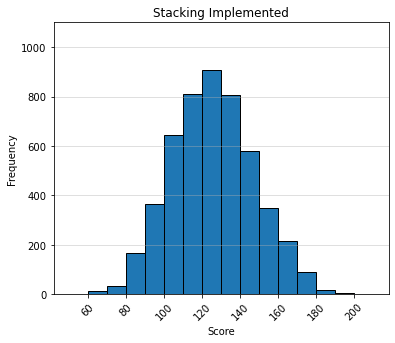

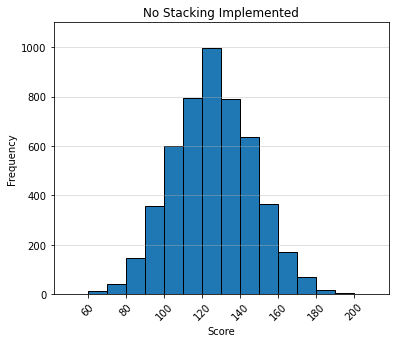

In [52]:
import math

def create_histogram(file_path,title):
    # Read the file and extract the scores
    with open(file_path, 'r') as file:
        scores = [float(line.strip()) for line in file]

    # Create histogram
    bins = range(50, 211, 10)
    fig = plt.figure(figsize=(6, 5))
    plt.hist(scores, bins=bins, edgecolor='black')

    # Customize the plot
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.ylim(0, 1100)
    
    # Adjust x-axis labels
    plt.xticks(rotation=45)

    # Display the histogram
    plt.show()


create_histogram('scores_stacking.txt', "Stacking Implemented")
create_histogram('scores_no stack.txt', "No Stacking Implemented")